# Data Exploration and Preprocessing

### import Libraries

In [462]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression


### Load Data 

In [463]:
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print("Dataset loaded successfully.")
        return data
    except FileNotFoundError:
        print("File not found. Please check the file path.")
    except pd.errors.EmptyDataError:
        print("File is empty.")
    except pd.errors.ParserError:
        print("Error parsing file.")
    return None

data = load_data('Unemployment in India.csv')
if data is not None:
    # Proceed with data analysis
    pass


Dataset loaded successfully.


In [464]:
data

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


# Inspecting the Dataset


In [465]:
# Displaying the first few rows of the dataset 
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [466]:

# Display summary statistics
print(data.describe())

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


In [467]:
# Dataset Columns
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [468]:
# Dataset Describe (all columns included)
data.describe(include= 'all').round(2)
     

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,1,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,740,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


In [469]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in Region is 28
No. of unique values in Date is 14
No. of unique values in Frequency is 1
No. of unique values in Estimated Unemployment Rate (%) is 624
No. of unique values in Estimated Employed is 740
No. of unique values in Estimated Labour Participation Rate (%) is 626
No. of unique values in Area is 2


In [470]:

# Display information about the dataset, including non-null counts and data types
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
None


# Handling Missing Values

In [471]:
# Check for null values
null_values = data.isnull().sum()

# Print the result
print("Null values in each column:\n", null_values)

Null values in each column:
 Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64


In [472]:
# Find rows with any null values
rows_with_nulls = data.isnull().any(axis=1)

# Filter the DataFrame to get those rows
filtered_data = data[rows_with_nulls]

# Print the filtered DataFrame containing rows with nulls
print(filtered_data)


    Region Date Frequency  Estimated Unemployment Rate (%)  \
359    NaN  NaN       NaN                              NaN   
360    NaN  NaN       NaN                              NaN   
361    NaN  NaN       NaN                              NaN   
362    NaN  NaN       NaN                              NaN   
363    NaN  NaN       NaN                              NaN   
364    NaN  NaN       NaN                              NaN   
365    NaN  NaN       NaN                              NaN   
366    NaN  NaN       NaN                              NaN   
367    NaN  NaN       NaN                              NaN   
368    NaN  NaN       NaN                              NaN   
369    NaN  NaN       NaN                              NaN   
370    NaN  NaN       NaN                              NaN   
371    NaN  NaN       NaN                              NaN   
372    NaN  NaN       NaN                              NaN   

     Estimated Employed  Estimated Labour Participation Rate (%) Area

In [473]:
data[355:375]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
355,West Bengal,31-03-2020,Monthly,7.02,25097812.0,49.18,Rural
356,West Bengal,30-04-2020,Monthly,18.32,17639370.0,39.27,Rural
357,West Bengal,31-05-2020,Monthly,18.43,19115772.0,42.53,Rural
358,West Bengal,30-06-2020,Monthly,4.94,21225887.0,40.44,Rural
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN


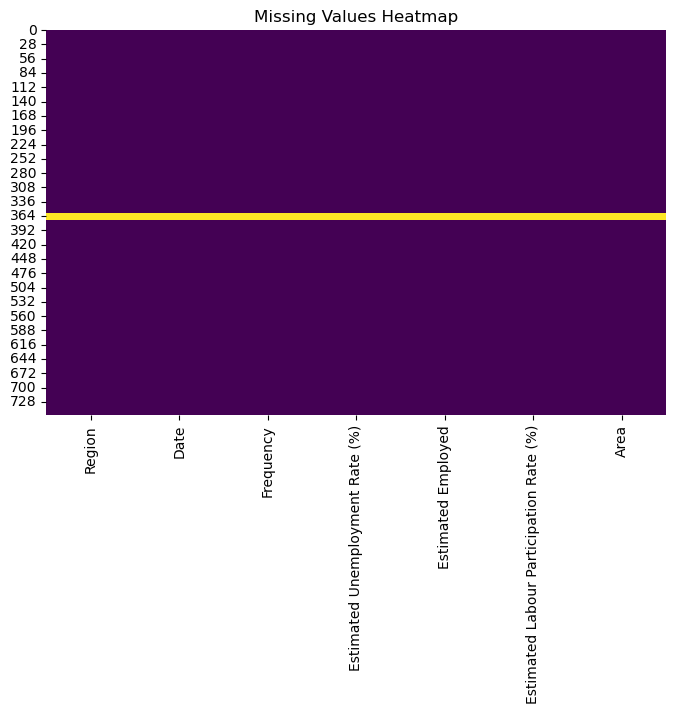

In [474]:
# Visualize missing values using a heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Data Cleaning and Transformation

In [475]:
# Rename the columns of the DataFrame
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Region']
     
# Convert the 'Frequency' column to a categorical data type
data['Frequency'] = data['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
data['Region'] = data['Region'].astype('category')
     
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
data['Month'] = data['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
data['Month_int'] = data['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [476]:
# Drop the 'Month' column from the DataFrame
data.drop(columns='Month', inplace=True)
     
# Lets create a copy of the dataset for the data of during lockdown period
df_ld = data.copy()
     
# Drop all the missing values from 'df' dataset
data=data.dropna()
     
# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (data['Date'] >= '2019-05-31') & (data['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
data = data.loc[mask]
     
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]

In [477]:
data

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,Month_int
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0
...,...,...,...,...,...,...,...,...
746,West Bengal,2019-11-30,Monthly,6.61,10768462.0,43.44,Urban,11.0
747,West Bengal,2019-12-31,Monthly,7.24,11335696.0,45.97,Urban,12.0
748,West Bengal,2020-01-31,Monthly,7.27,11208617.0,45.39,Urban,1.0
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2.0


# Data Visualization

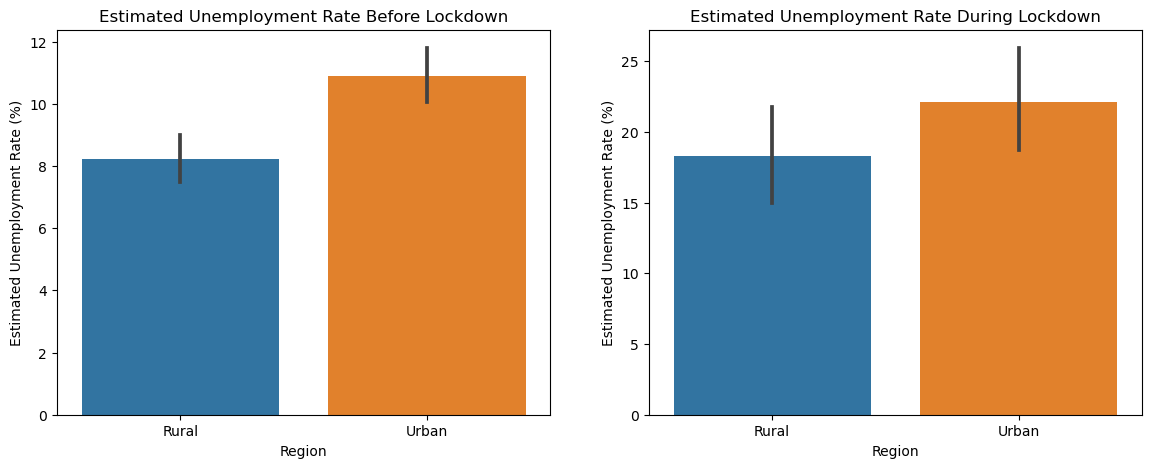

In [478]:
# Chart - 1 Bar plot visualization code for Region wise Estimated Unemployment Rate before and during lockdown

# Create a figure with two subplots side by side.
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=data)

# Set labels and title for the first subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df_ld)

# Set labels and title for the second subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

# Display the subplots side by side.
plt.show()
     

C:\Users\Sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Sai\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.5% of the points cannot be

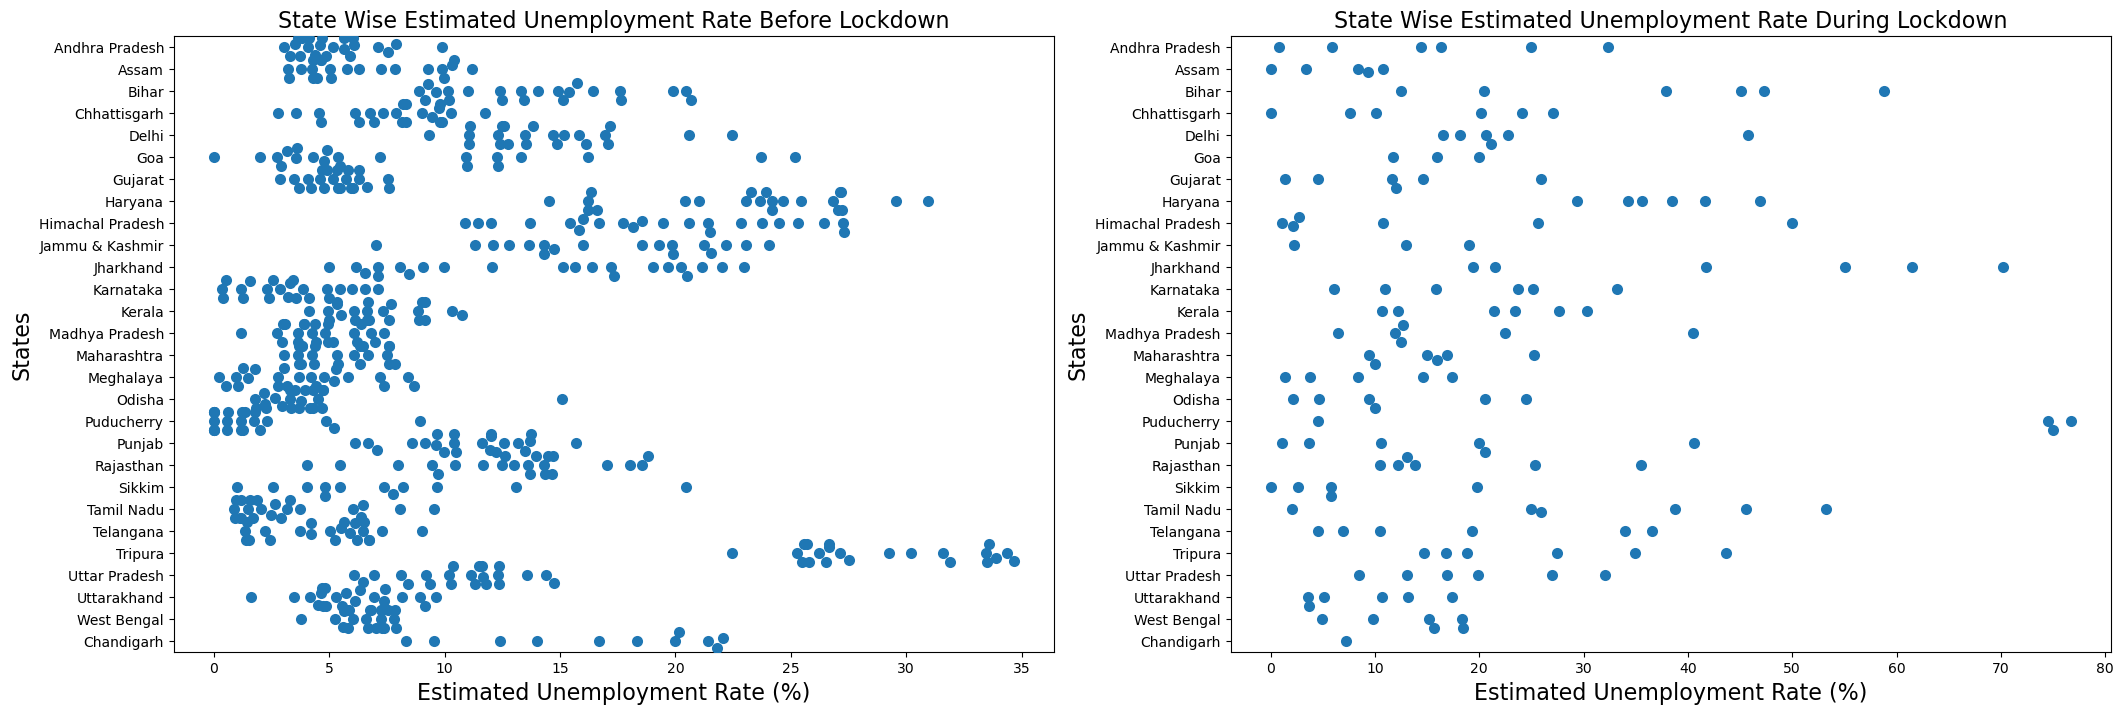

In [479]:
# Chart - 2 Swarm plot visualization code for State Wise Estimated Unemployment Rate before and during lockdown.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate before lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate (%)', data=data, size=8)

# Set labels for the first subplot.
plt.xlabel("Estimated Unemployment Rate (%)", fontsize=16)
plt.ylabel("States", fontsize=16)

# Subplot 2: State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate during lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate (%)', data=df_ld, size=8)

# Set labels for the second subplot.
plt.xlabel("Estimated Unemployment Rate (%)", fontsize=16)
plt.ylabel("States", fontsize=16)

# Display the subplots side by side.
plt.show()
     

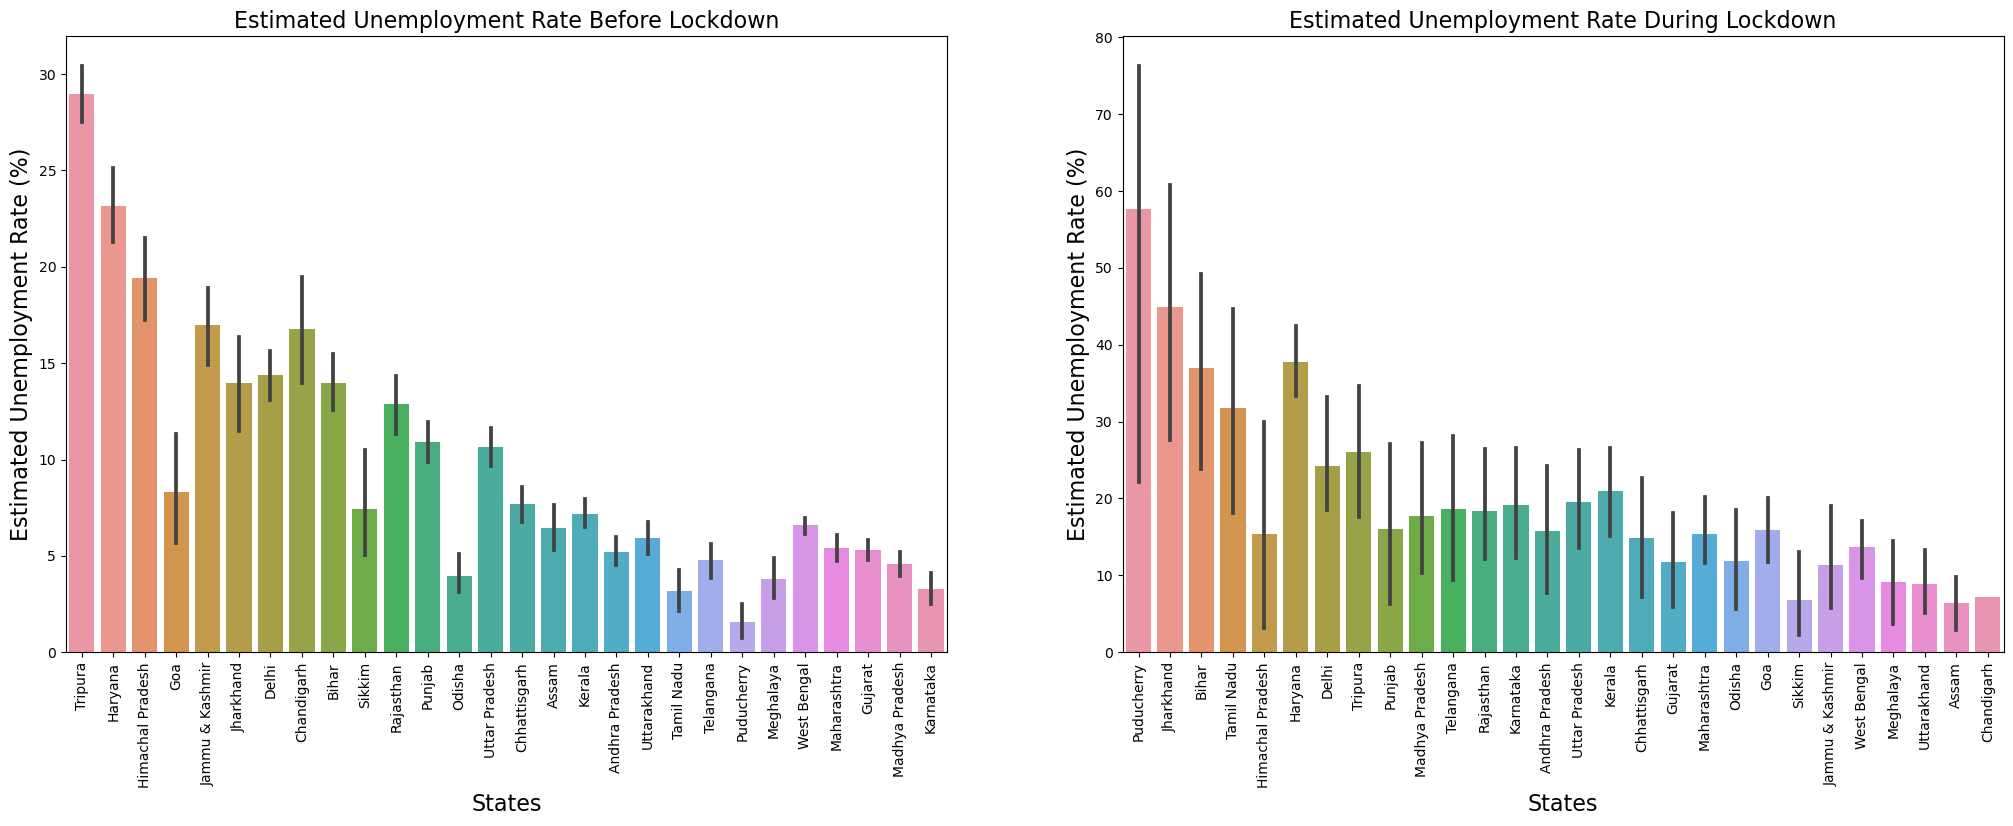

In [480]:

# Chart - 3 Bar for visualization code for State wise Estimated Unemployment Rate before and during lockdown time.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=data.sort_values(by='Estimated Unemployment Rate (%)', ascending=False), x="States", y="Estimated Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate (%)', ascending=False), x="States", y="Estimated Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate (%)', fontsize=16)

# Display the subplots side by side.
plt.show()
     

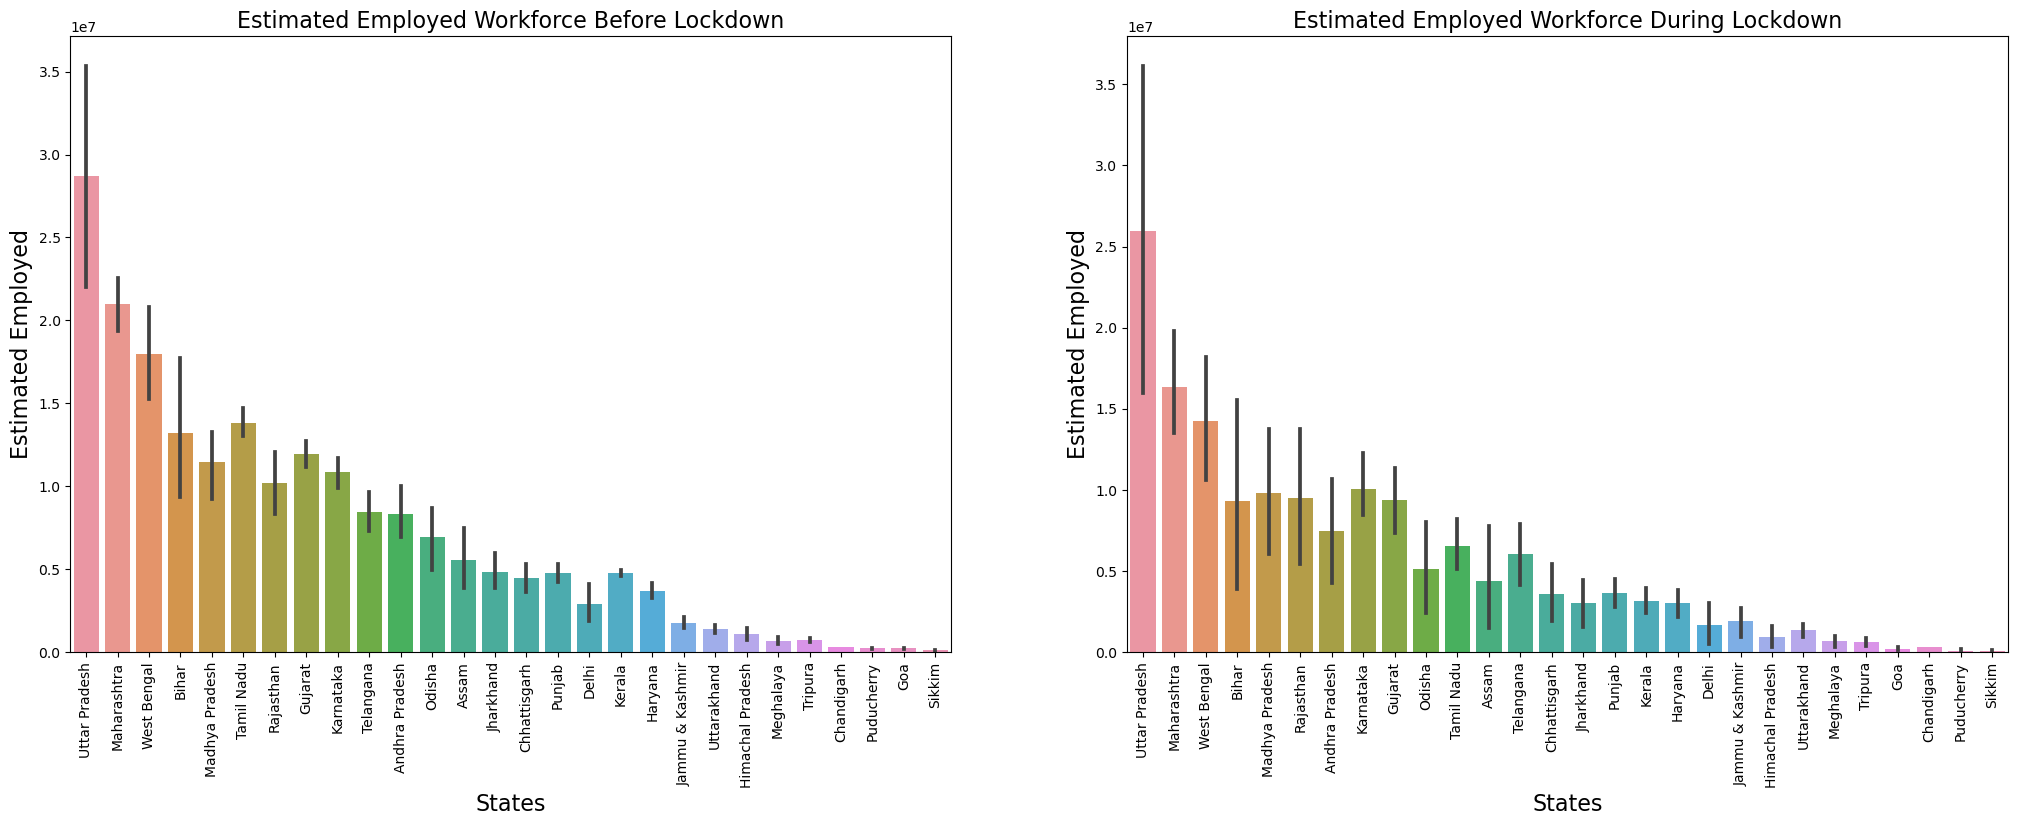

In [481]:
# Chart - 4 Bar plot visualization code for state wise Estimated Employed Workforce

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
sns.barplot(data=data.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()
     


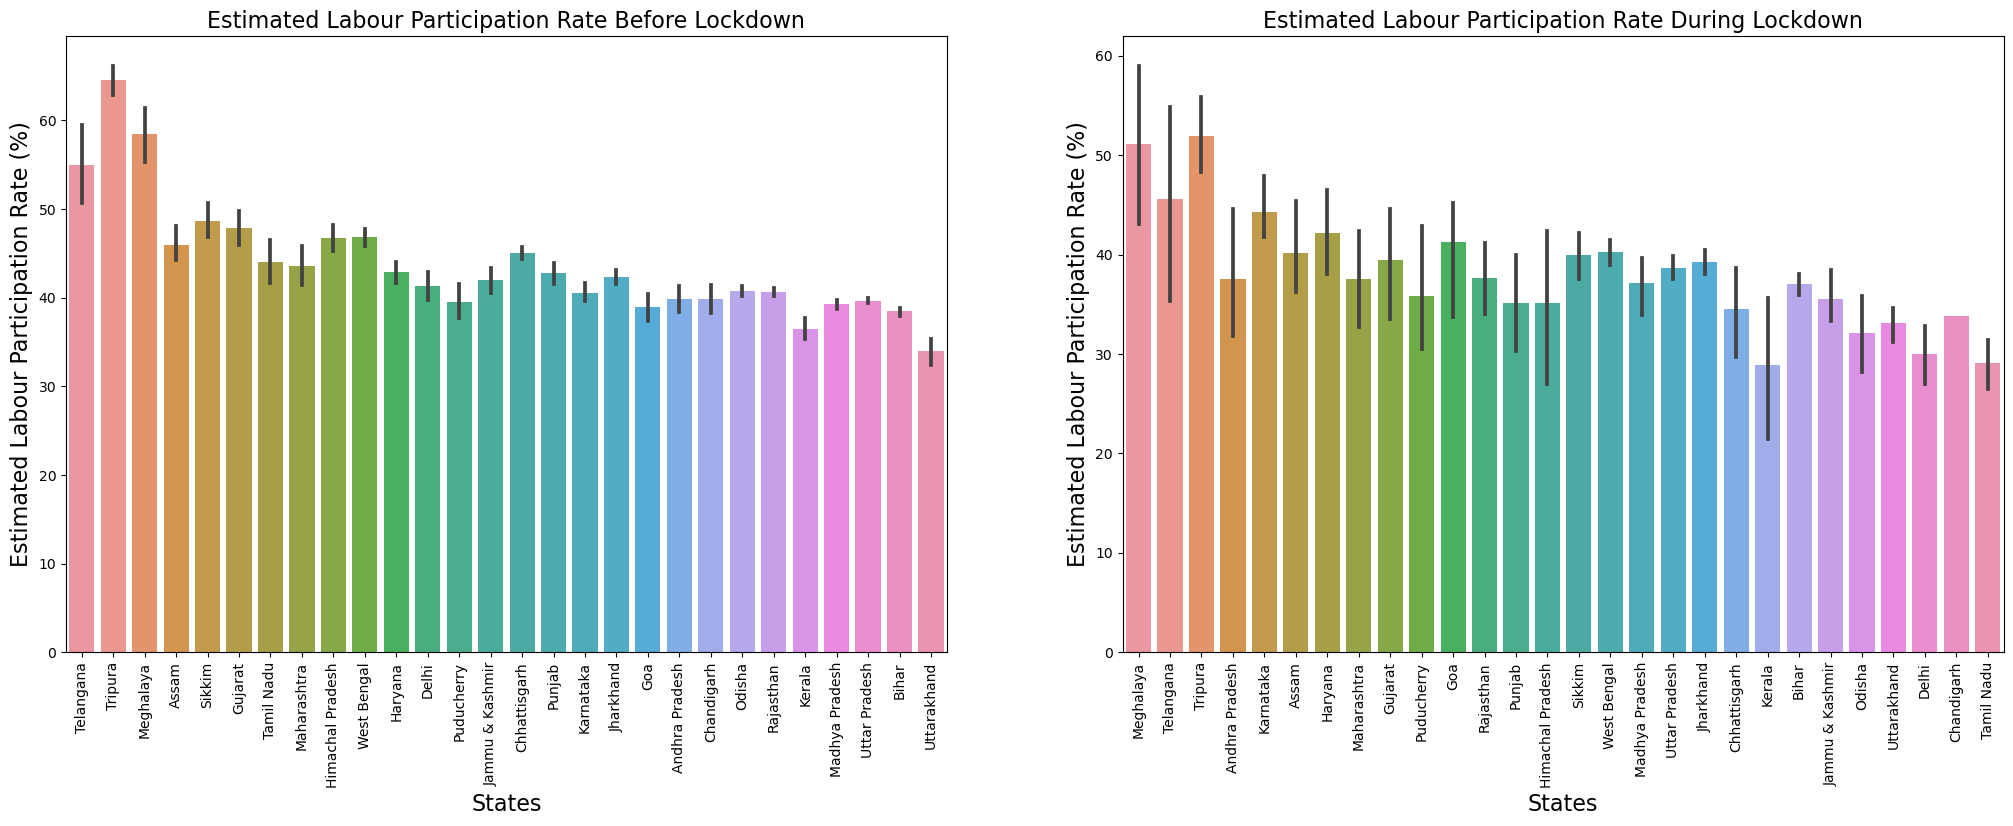

In [482]:
# Chart - 5 Bar plot visualization code for state wise Estimated Labour Participation Rate

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=data.sort_values(by='Estimated Labour Participation Rate (%)', ascending=False), x="States", y="Estimated Labour Participation Rate (%)")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate (%)', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate (%)', ascending=False), x="States", y="Estimated Labour Participation Rate (%)")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate (%)', fontsize=16)

# Display the subplots side by side.
plt.show()

In [483]:
# Create new DataFrames
df1_stats = data[['Estimated Unemployment Rate (%)','Estimated Employed', 'Estimated Labour Participation Rate (%)']]

df2_stats = df_ld[['Estimated Unemployment Rate (%)','Estimated Employed', 'Estimated Labour Participation Rate (%)']]
     

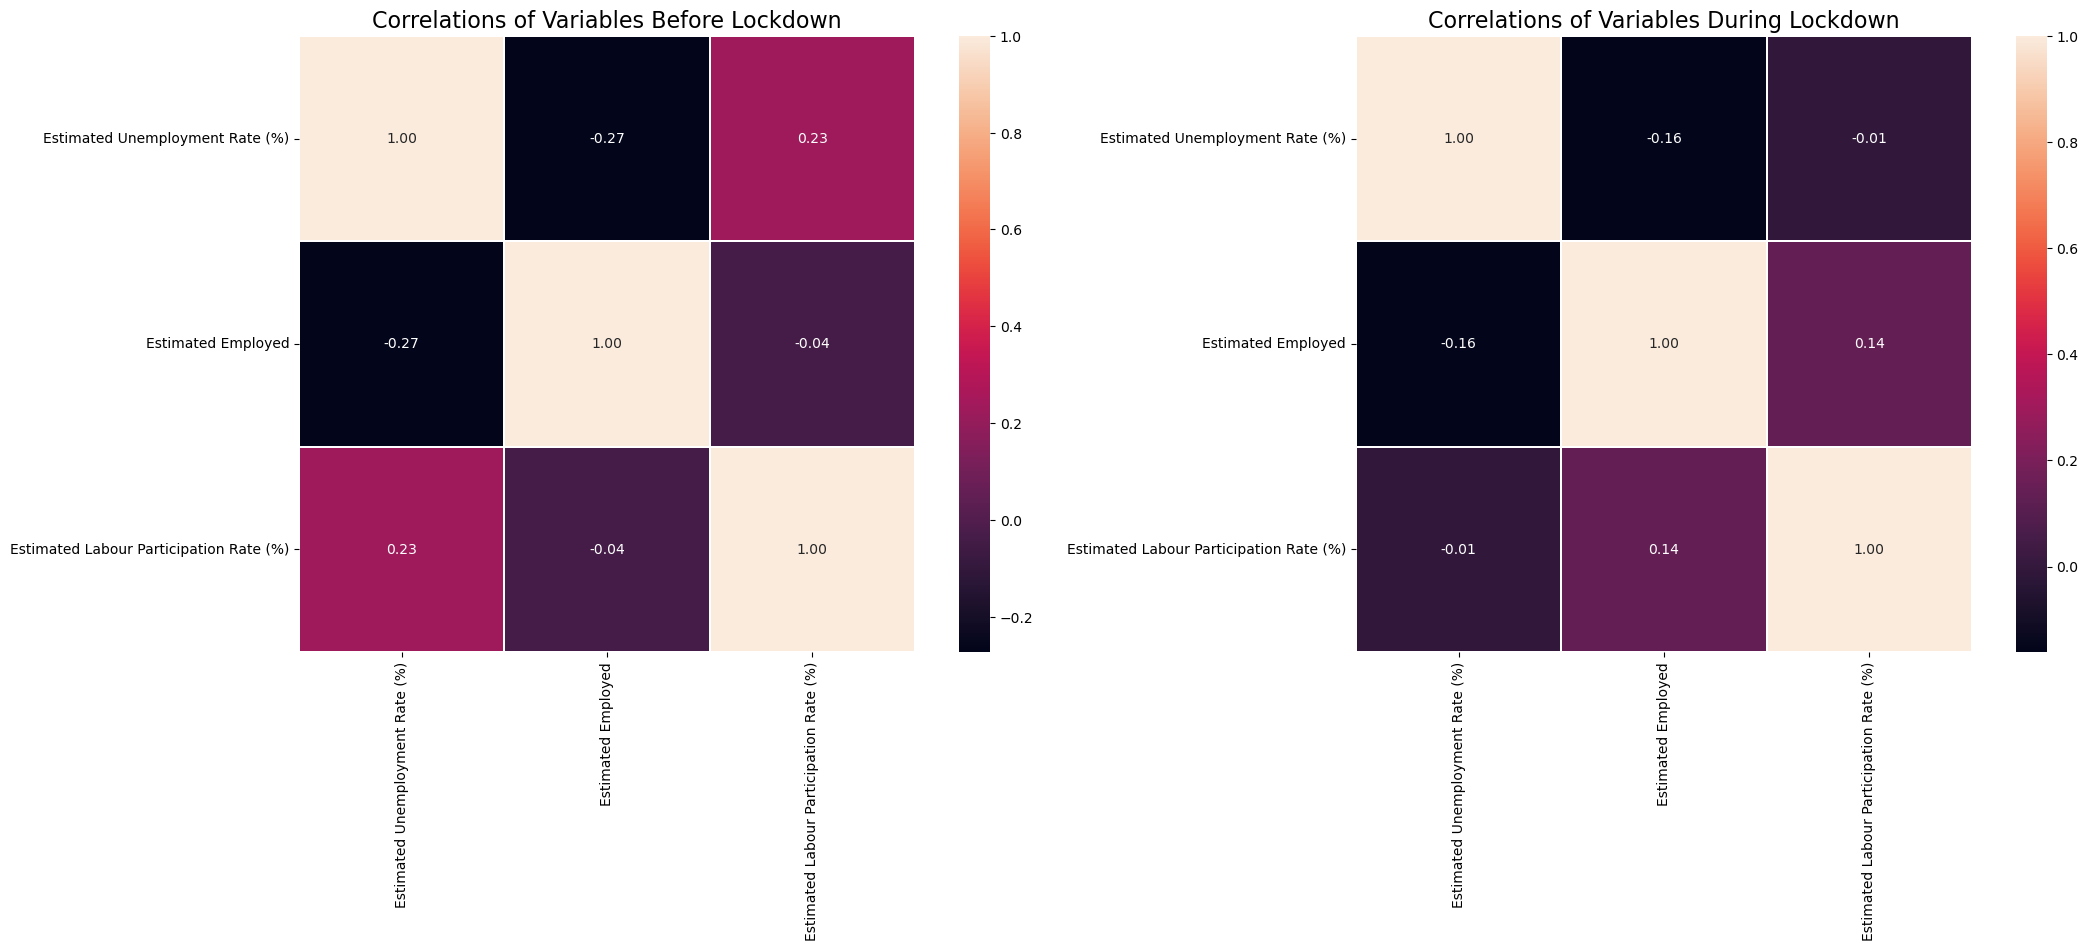

In [484]:
# Chart - 6 Correlation heatmap visualization code

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df1_stats.
sns.heatmap(df1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df2_stats.
sns.heatmap(df2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Display the subplots side by side.
plt.show()
     


# Statistical Analysis

In [485]:


# Separate data into rural and urban
rural = data[data['States'] == 'Rural']['Estimated Unemployment Rate (%)']
urban = data[data['States'] == 'Urban']['Estimated Unemployment Rate (%)']

# Perform t-test
t_stat, p_val = ttest_ind(rural, urban)
print(f'T-test: t-statistic = {t_stat}, p-value = {p_val}')

# T-test result interpretation
if p_val < 0.05:
    print(f'T-test: The difference between rural and urban unemployment rates is statistically significant (p-value = {p_val}).')
else:
    print(f'T-test: No statistically significant difference between rural and urban unemployment rates (p-value = {p_val}).')


T-test: t-statistic = nan, p-value = nan
T-test: No statistically significant difference between rural and urban unemployment rates (p-value = nan).


In [486]:


# Prepare data for ANOVA
region_groups = [group['Estimated Unemployment Rate (%)'].values for name, group in data.groupby('Region')]

# Perform ANOVA
f_stat, p_val = f_oneway(*region_groups)
print(f'ANOVA: F-statistic = {f_stat}, p-value = {p_val}')

# ANOVA result interpretation
if p_val < 0.05:
    print(f'ANOVA: There are significant differences between unemployment rates across regions (p-value = {p_val}).')
else:
    print(f'ANOVA: No significant differences between unemployment rates across regions (p-value = {p_val}).')


ANOVA: F-statistic = 20.03727694539018, p-value = 9.128838113578186e-06
ANOVA: There are significant differences between unemployment rates across regions (p-value = 9.128838113578186e-06).


# Machine Learning

In [487]:
# Prepare the dataset for regression
X = data[['Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = data['Estimated Unemployment Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [488]:

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)



In [489]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 58.5693235714052
Mean Absolute Error: 6.035959714035827


In [490]:
# Additional evaluation metric
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.1833586315394512


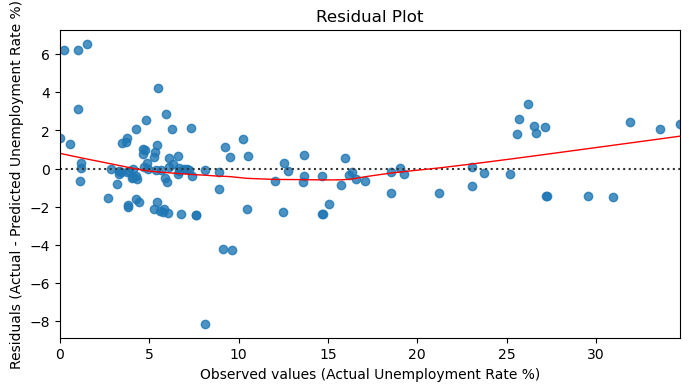

In [491]:
# Residual plot

# Create a new figure with a specified size
plt.figure(figsize=(8, 4))

# Create a residual plot using seaborn's residplot function
# x=y_test contains the actual values of the unemployment rate from the test set
# y=y_pred contains the predicted values of the unemployment rate from the model
# lowess=True fits a locally weighted scatterplot smoothing line
# line_kws={'color': 'red', 'lw': 1} specifies the color and width of the smoothing line
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red', 'lw': 1})

# Add a title to the plot
plt.title('Residual Plot')

# Add labels to the x and y axes
plt.xlabel('Observed values (Actual Unemployment Rate %)')
plt.ylabel('Residuals (Actual - Predicted Unemployment Rate %)')

# Display the plot
plt.show()


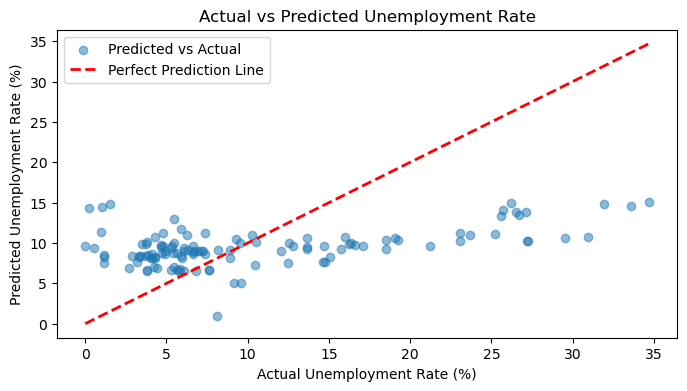

In [492]:
# Actual vs. Predicted plot

# Create a new figure with a specified size
plt.figure(figsize=(8, 4))

# Scatter plot of actual vs. predicted values
# y_test contains the actual values of the unemployment rate from the test set
# y_pred contains the predicted values of the unemployment rate from the model
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')

# Plot a reference line y=x (red dashed line) to compare the actual vs. predicted values
# This line represents the ideal scenario where predicted values perfectly match the actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction Line')

# Add labels to the x and y axes
plt.xlabel('Actual Unemployment Rate (%)')
plt.ylabel('Predicted Unemployment Rate (%)')

# Add a title to the plot
plt.title('Actual vs Predicted Unemployment Rate')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()
